## <b>PART 6: Maximum common substructure</b>

In [1]:
# Import necessary modules
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
from collections import defaultdict
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdFMCS
import pandas as pd
import numpy
from rdkit.Chem import PandasTools
IPythonConsole.ipython_useSVG=True

RDKit WARNING: [13:39:36] Enabling RDKit 2019.09.3 jupyter extensions


Set with 128 molecules loaded


RDKit ERROR: [13:39:38] ERROR: Problems encountered parsing data fields


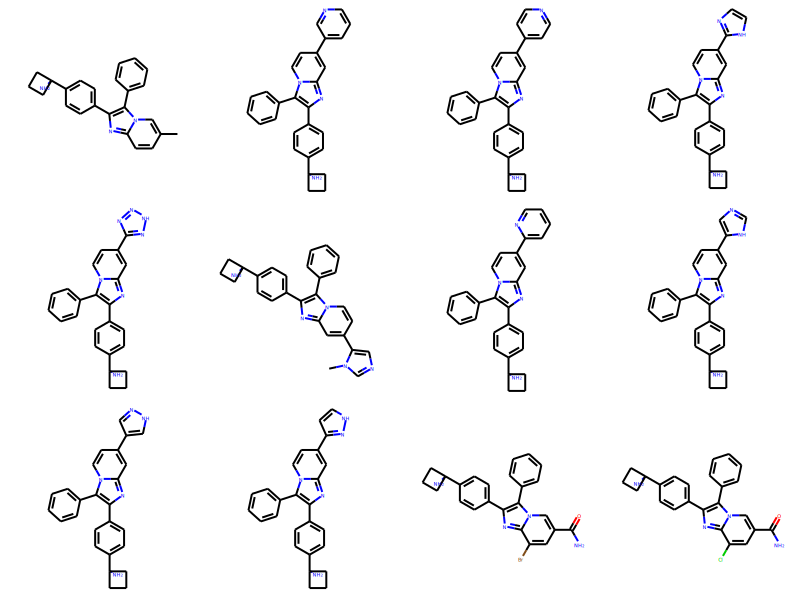

In [2]:
suppl = Chem.SDMolSupplier('GSKmol_molSet_largestCluster.sdf')
mols = [x for x in suppl]
print('Set with %d molecules loaded'%(len(mols)))

# Show only first 12 molecules
#Draw.MolsToGridImage(mols[:12], legends=[x.GetProp("_Name") for x in mols[:12]], molsPerRow=4)
Draw.MolsToGridImage(mols[:12], molsPerRow=4)

SMARTS string: [#7]-[#6]1(-[#6]-[#6]-[#6]-1)-[#6]1:[#6]:[#6]:[#6](:[#6]:[#6]:1)-[#6]1:[#7]:[#6]:[#7](:[#6]:1-[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1):[#6]:[#6]:,-[#6]


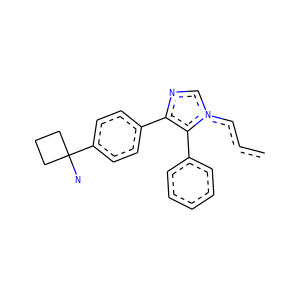

In [3]:
mcs1 = rdFMCS.FindMCS(mols)
print('SMARTS string: %s'%mcs1.smartsString)
# Draw substructure
m1 = Chem.MolFromSmarts(mcs1.smartsString)
Draw.MolToImage(m1)

In [4]:
# Highlight the MCS in our query molecules
def highlightMolecules(cur_mols, cur_mcs, num, label=True):
    pattern = Chem.MolFromSmarts(cur_mcs.smartsString)
    matching = [cur_mols[i].GetSubstructMatch(pattern) for i in range(0,len(cur_mols))]
    
    if label==True:
        return Draw.MolsToGridImage(cur_mols[:num], 
                                    legends=[x.GetProp("_Name") for x in mols[:num]], 
                                    molsPerRow=3,
                                    highlightAtomLists = matching[:num],
                                    subImgSize=(300,250))
    else:
        return Draw.MolsToGridImage(cur_mols[:num], 
                                    molsPerRow=3,
                                    highlightAtomLists = matching[:num],
                                    subImgSize=(300,250))


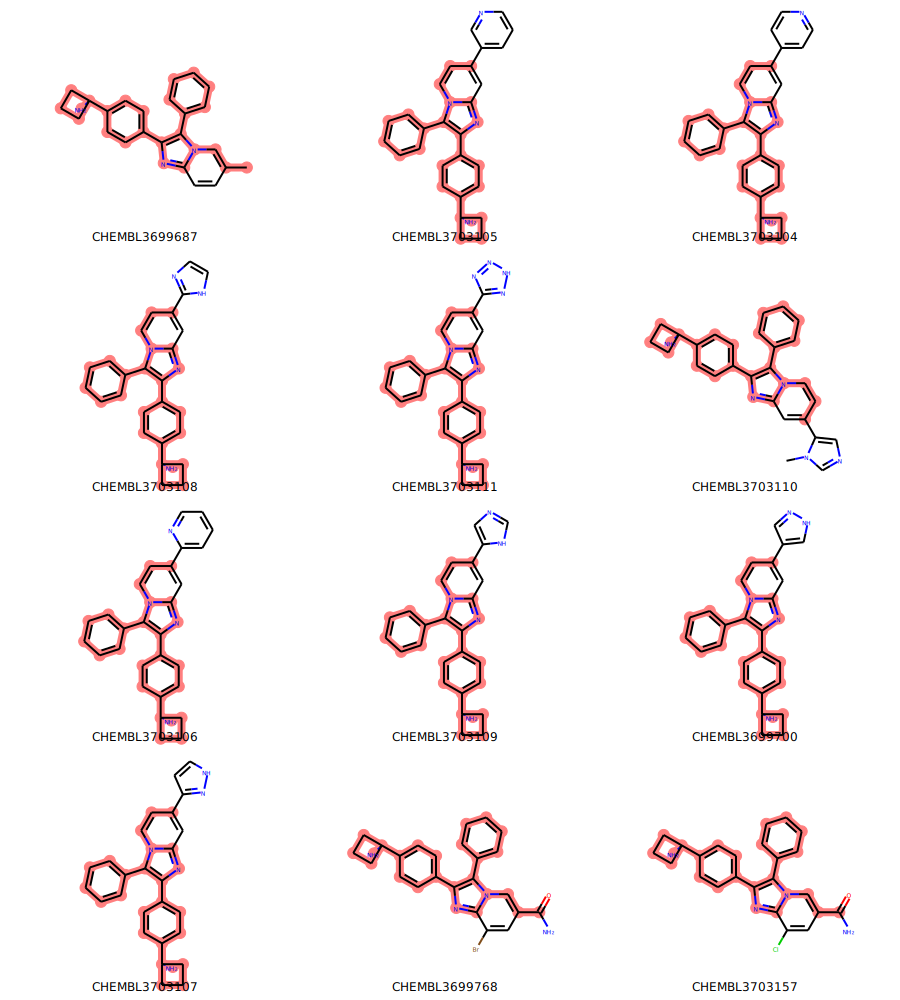

In [5]:
highlightMolecules(mols, mcs1, 12)

In [6]:
img = highlightMolecules(mols, mcs1, 3)

# Get SVG data
molsvg = img.data

# Set background to transparent
molsvg = molsvg.replace("opacity:1.0", "opacity:0.0");
# Enlarge size of label
molsvg = molsvg.replace("12px", "20px")

# Save altered SVG data to file
f = open("GSKmol_mcs_largestcluster.svg", "w")
f.write(molsvg)
f.close()

SMARTS string: [#7]-[#6]1(-[#6]-[#6]-[#6]-1)-[#6]1:[#6]:[#6]:[#6](:[#6]:[#6]:1)-[#6]1:[#7]:[#6]2:[#7](:[#6]:1-[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1):[#6]:[#6]:[#6]:[#6]:2


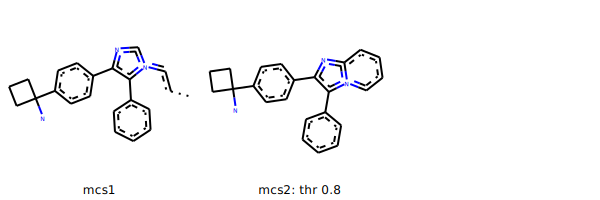

In [7]:
mcs2 = rdFMCS.FindMCS(mols, threshold=0.8)
print('SMARTS string: %s'%mcs2.smartsString)

# Draw substructure
m2 = Chem.MolFromSmarts(mcs2.smartsString)
Draw.MolsToGridImage([m1,m2], legends=['mcs1', 'mcs2: thr 0.8'])

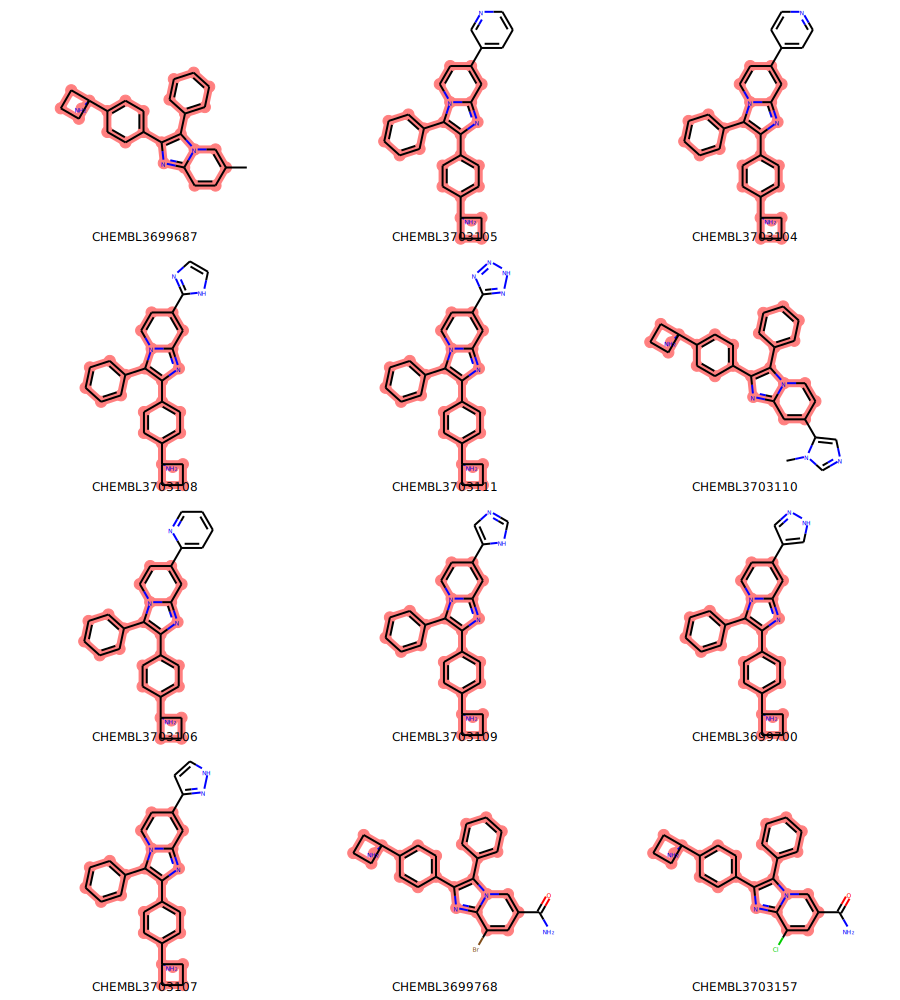

In [8]:
highlightMolecules(mols, mcs2, 12)

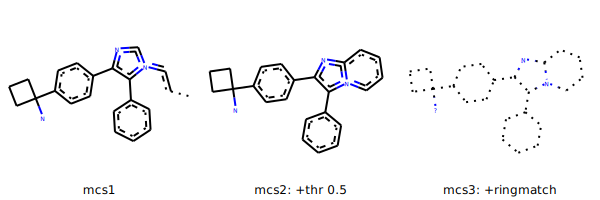

In [9]:
mcs3 = rdFMCS.FindMCS(mols, ringMatchesRingOnly=True, threshold=0.8)
# Draw substructure
m3 = Chem.MolFromSmarts(mcs3.smartsString)
Draw.MolsToGridImage([m1,m2,m3], legends=['mcs1', 'mcs2: +thr 0.5','mcs3: +ringmatch'])

(827, 5)
(31, 5)


,molecule_chembl_id,units,IC50,smiles,pIC50,ROMol
0,CHEMBL3701767,nM,0.26,CC1(O)CC(N)(C1)c2ccc(cc2)c3nc4c5cc(ccc5OCn4c3c...,9.585027,
1,CHEMBL3701740,nM,0.27,COc1cc(OC)c2c(OCn3c2nc(c4ccc(cc4)C5(N)CC(O)(C5...,9.568636,
2,CHEMBL3701766,nM,0.28,CNC(=O)c1ccc2OCn3c(nc(c4ccc(cc4)C5(N)CC(C)(O)C...,9.552842,

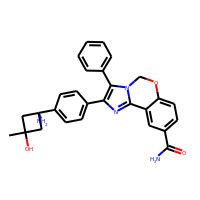
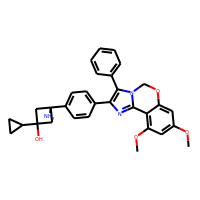
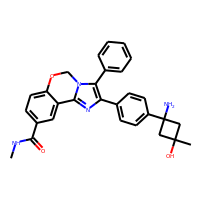

In [10]:
# Read full EGFR data
mol_df=pd.read_csv('GSKmol_compounds.csv', index_col=0)
print(mol_df.shape)

# Only keep molecules with pIC50 > 9 (IC50 > 1nM)
mol_df=mol_df[mol_df.pIC50>9]
print(mol_df.shape)

# Add molecule column to data frame
PandasTools.AddMoleculeColumnToFrame(mol_df, 'smiles')
mol_df.head(3)


SMARTS string1: [#6]-[#6]1(-[#8])-[#6]-[#6](-[#6]-1)-[#6]1:[#6]:[#6]:[#6](:[#6]:[#6]:1)-[#6]1:[#7]:[#6]:[#7](:[#6]:1-[#6](:[#6]:[#6]):[#6])-[#6]-[#8]-[#6]:[#6]:[#6]:,-[#6]
SMARTS string2: [#6]-[#6]1(-[#8])-[#6]-[#6](-[#6]-1)-[#6]1:[#6]:[#6]:[#6](:[#6]:[#6]:1)-[#6]1:[#7]:[#6]2:[#7](:[#6]:1-[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1)-[#6]-[#8]-[#6]1:[#6]-2:[#6]:[#6]:[#6]:[#6]:1
SMARTS string3: [#6&R]1(-&!@[#8&!R])-&@[#6&R]-&@[#6&R](-&@[#6&R]-&@1)-&!@[#6&R]1:&@[#6&R]:&@[#6&R]:&@[#6&R](:&@[#6&R]:&@[#6&R]:&@1)-&!@[#6&R]1:&@[#7&R]:&@[#6&R]2:&@[#7&R](:&@[#6&R]:&@1-&!@[#6&R]1:&@[#6&R]:&@[#6&R]:&@[#6&R]:&@[#6&R]:&@[#6&R]:&@1)-&@[#6&R]-&@[#8&R]-&@[#6&R]1:&@[#6&R]-&@2:&@[#6&R]:&@[#6&R]:&@[#6&R]:&@[#6&R]:&@1


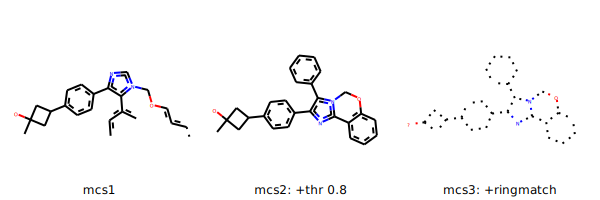

In [11]:
# We do our calculations on the selected highly active molecules only 
mols= []
for idx, row in mol_df.iterrows():
    m = Chem.MolFromSmiles(row.smiles)
    m.SetProp("_Name",row.molecule_chembl_id)
    mols.append(m)
# In the interest of time, we randomly pick 50 molecules from this set 
rand_mols = [mols[i] for i in numpy.random.choice(range(len(mols)), size=50)]

mcs1 = rdFMCS.FindMCS(rand_mols)
print('SMARTS string1: %s'%mcs1.smartsString)
mcs2 = rdFMCS.FindMCS(rand_mols, threshold=0.8)
print('SMARTS string2: %s'%mcs2.smartsString)
mcs3 = rdFMCS.FindMCS(rand_mols, ringMatchesRingOnly=True, threshold=0.8)
print('SMARTS string3: %s'%mcs3.smartsString)

# Draw substructure
m1 = Chem.MolFromSmarts(mcs1.smartsString)
m2 = Chem.MolFromSmarts(mcs2.smartsString)
m3 = Chem.MolFromSmarts(mcs3.smartsString)

Draw.MolsToGridImage([m1,m2,m3], legends=['mcs1', 'mcs2: +thr 0.8','mcs3: +ringmatch'])

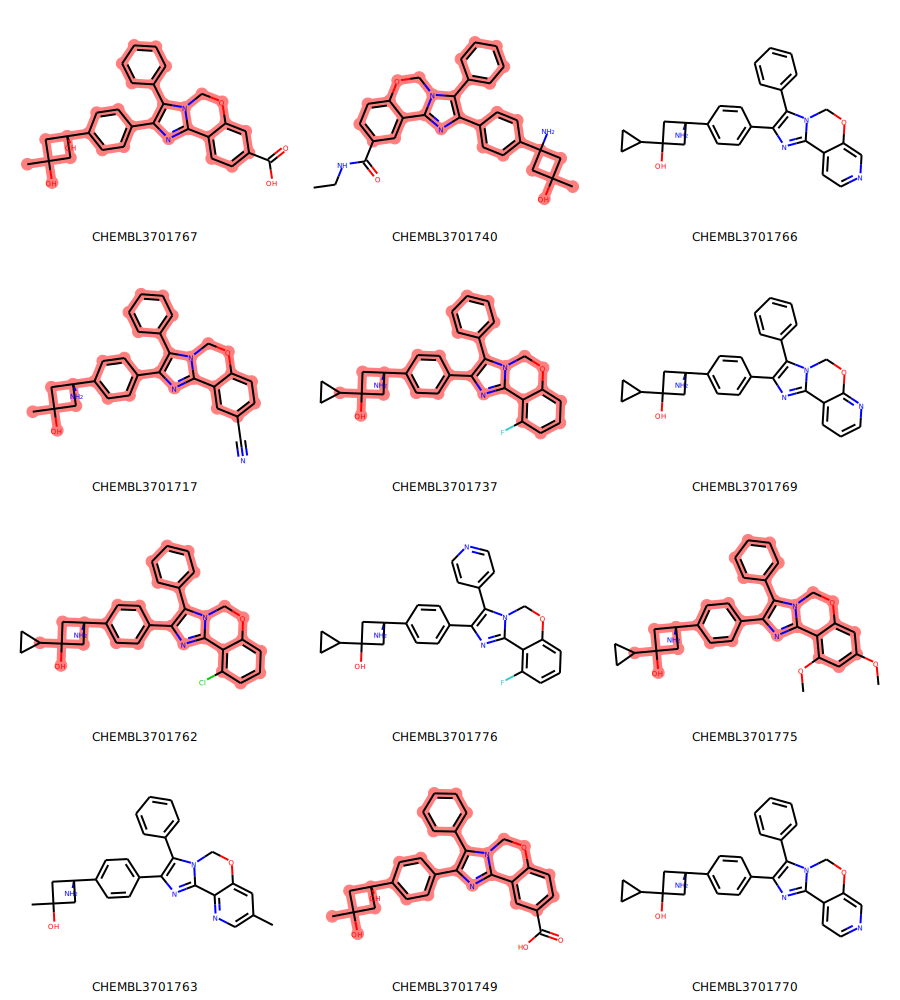

In [12]:
highlightMolecules(rand_mols, mcs2, 12)

In [13]:
from ipywidgets import interactive, interact, fixed, Text, widgets
from IPython.display import SVG,display

In [14]:
def renderMCS(perc):
    tmcs = rdFMCS.FindMCS(rand_mols, threshold=perc/100.)
    if tmcs is None:
        print('No MCS found')
        return None
    else:
        m = Chem.MolFromSmarts(tmcs.smartsString)
        print(tmcs.smartsString)
        return(display(SVG(IPythonConsole._toSVG(m))))

In [15]:
# Note that the slider may take a few seconds to react
w = interact(renderMCS, perc=widgets.IntSlider(min=0,max=100,step=20,value=80))

interactive(children=(IntSlider(value=80, description='perc', step=20), Output()), _dom_classes=('widget-inter…

## <b>PART 7: Ligand Based Screening (Machine Learning)</b>

In [18]:
# Import statements
# General:
import pandas as pd
import numpy as np

# rdkit:
from rdkit import Chem
from rdkit.Chem import RDKFingerprint
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect
from rdkit.Chem.AllChem import GetHashedTopologicalTorsionFingerprintAsBitVect
from rdkit.Chem import MACCSkeys
from rdkit.DataStructs import ConvertToNumpyArray

# sklearn:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
# from sklearn.manifold import MDS

# matplotlib:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# seaborn:
import seaborn as sns

In [19]:
def calculate_fp(mol, method='maccs', n_bits=2048):
    # mol = Chem molecule object
    # Function to calculate molecular fingerprints given the number of bits and the method
    if method == 'maccs':
        return MACCSkeys.GenMACCSKeys(mol)
    if method == 'ecfp4':
        return GetMorganFingerprintAsBitVect(mol, 2, nBits=n_bits, useFeatures=False)
    if method == 'ecfp6':
        return GetMorganFingerprintAsBitVect(mol, 3, nBits=n_bits, useFeatures=False)
    if method == 'torsion':
        return GetHashedTopologicalTorsionFingerprintAsBitVect(mol, nBits=n_bits)
    if method == 'rdk5':
        return RDKFingerprint(mol, maxPath=5, fpSize=1024, nBitsPerHash=2)

In [20]:
def create_mol(df_l, n_bits):
    # Construct a molecule from a SMILES string
    # Generate mol column: Returns a Mol object, None on failure.
    df_l['mol'] = df_l.smiles.apply(Chem.MolFromSmiles)
    # Create a column for storing the molecular fingerprint as fingerprint object
    df_l['bv'] = df_l.mol.apply(
        # Apply the lambda function "calculate_fp" for each molecule
        lambda x: calculate_fp(x, 'maccs', n_bits)
    )
    # Allocate np.array to hold fp bit-vector (np = numpy)
    df_l['np_bv'] = np.zeros((len(df_l), df_l['bv'][0].GetNumBits())).tolist()
    df_l.np_bv = df_l.np_bv.apply(np.array)
    # Convert the object fingerprint to NumpyArray and store in np_bv
    df_l.apply(lambda x: ConvertToNumpyArray(x.bv, x.np_bv), axis=1)

In [21]:
# Read data from previous talktorials
df = pd.read_csv('GSKmol_compounds_lipinski.csv', delimiter=';', index_col=0)
# Look at head
print(df.shape)
print(df.info())

(635, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 635 entries, 0 to 826
Data columns (total 10 columns):
molecule_chembl_id      635 non-null object
units                   635 non-null object
IC50                    635 non-null float64
smiles                  635 non-null object
pIC50                   635 non-null float64
MW                      635 non-null float64
HBA                     635 non-null int64
HBD                     635 non-null int64
LogP                    635 non-null float64
rule_of_five_conform    635 non-null object
dtypes: float64(4), int64(2), object(4)
memory usage: 54.6+ KB
None


In [22]:
# Drop unnecessary columns
df_new=df.drop(['units', 'IC50'], axis=1)
# Create molecules from smiles and their fingerprints
create_mol(df_new, 2048)
# Add column for activity
df_new['active'] = np.zeros(len(df_new))

# Mark every molecule as active with an pIC50 of > 6.3
df_new.loc[df_new[df_new.pIC50 >= 6.3].index, 'active'] = 1.0
print('actives: %d, inactives: %d' % (df_new.active.sum(), len(df_new)-df_new.active.sum()))

actives: 499, inactives: 136


,molecule_chembl_id,smiles,pIC50,MW,HBA,HBD,LogP,rule_of_five_conform,mol,bv,np_bv,active
0,CHEMBL3701767,CC1(O)CC(N)(C1)c2ccc(cc2)c3nc4c5cc(ccc5OCn4c3c...,9.585027,466.200491,6,3,4.0317,yes,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0
2,CHEMBL3701766,CNC(=O)c1ccc2OCn3c(nc(c4ccc(cc4)C5(N)CC(C)(O)C...,9.552842,480.216141,6,3,4.2924,yes,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0
3,CHEMBL3701717,NC1(CC(O)(C1)C2CC2)c3ccc(cc3)c4nc5c6c(F)cccc6O...,9.537602,467.200905,5,2,5.4620,yes,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0

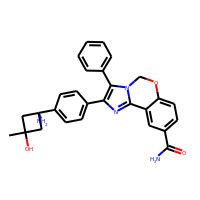
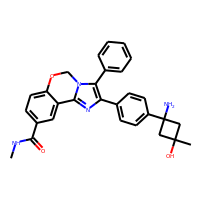
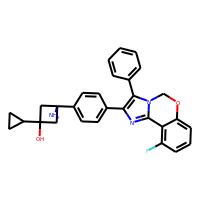

In [23]:
df_new.head(3)

In [24]:
# Function for a cross-validation loop.
def crossvalidation(model_l, df_l, n_folds=10):
    # Given the selected model, the dataFrame and the number of folds the function executes a crossvalidation and returns
    # accuracy, sensitivity, specificity for the prediction as well as fpr, tpr, roc_auc for each fold
    
    # Empty results vector
    results = []
    # Shuffle the indices for the k-fold cross-validation
    kf = KFold(n_splits=n_folds, shuffle=True)
    # Labels initialized with -1 for each data-point
    labels = -1 * np.ones(len(df_l))
    # Loop over the folds
    for train_index, test_index in kf.split(df_l):
        # Training
        # Convert the bit-vector and the label to a list
        train_x = df_l.iloc[train_index].bv.tolist()
        train_y = df_l.iloc[train_index].active.tolist()
        # Fit the model
        model_l.fit(train_x, train_y)

        # Testing
        # Convert the bit-vector and the label to a list
        test_x = df_l.iloc[test_index].bv.tolist()
        test_y = df_l.iloc[test_index].active.tolist()
        # Predict on test-set
        prediction_prob = model_l.predict_proba(test_x)[:, 1]
        # Save the predicted label of each fold
        labels[test_index] = model_l.predict(test_x)

        # Performance
        # Get fpr, tpr and roc_auc for each fold
        fpr_l, tpr_l, _ = roc_curve(test_y, prediction_prob)
        roc_auc_l = auc(fpr_l, tpr_l)
        # Append to results
        results.append((fpr_l, tpr_l, roc_auc_l))

    # Get overall accuracy, sensitivity, specificity
    y = df_l.active.tolist()
    acc = accuracy_score(df_l.active.tolist(), labels)
    sens = recall_score(df_l.active.tolist(), labels)
    spec = (acc * len(y) - sens * sum(y)) / (len(y) - sum(y))
    return acc, sens, spec, results

In [25]:
np.linspace(0.1, 1.0, 10)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [30]:
def print_results(acc, sens, spec, stat_res, main_text, file_name, plot_figure=1):
    plt.figure(plot_figure, figsize=(7, 7))
    cmap = cm.get_cmap('Blues')
    
    colors = [cmap(i) for i in np.linspace(0.3, 1.0, 10)]
    #colors = ["#3465A4"]
    for i, (fpr_l, tpr_l, roc_auc_l) in enumerate(stat_res):
        plt.plot(fpr_l, tpr_l, label='AUC CV$_{0}$ = {1:0.2f}'.format(str(i),roc_auc_l), lw=2, color=colors[i])
        plt.xlim([-0.05, 1.05])
        plt.ylim([-0.05, 1.05])
    plt.plot([0, 1], [0, 1], linestyle='--', label='Random', lw=2, color="black")  # Random curve
    plt.xlabel('False positive rate', size=24)
    plt.ylabel('True positive rate', size=24)
    plt.title(main_text, size=24)
    plt.tick_params(labelsize=16)
    plt.legend(fontsize=16)
    
    # Save plot - use bbox_inches to include text boxes:
    # https://stackoverflow.com/questions/44642082/text-or-legend-cut-from-matplotlib-figure-on-savefig?rq=1
    plt.savefig("Data/" + file_name, dpi=300, bbox_inches="tight", transparent=True)
    
    plt.show()
    # Calculate mean AUC and print
    m_auc = np.mean([elem[2] for elem in r[3]])
    print('Mean AUC: {}'.format(m_auc))

    # Show overall accuracy, sensitivity, specificity
    print('Sensitivity: {}\nAccuracy: {}\nSpecificity: {}\n'.format(acc, sens, spec))
    print('\n')

In [31]:
# Set model parameter for random Forest
param = {'max_features': 'auto',
         'n_estimators': 2000,
         'criterion': 'entropy',
         'min_samples_leaf': 1}
modelRf = RandomForestClassifier(**param)

# Do cross-validation procedure with 10 folds
r = crossvalidation(modelRf, df_new, 10)

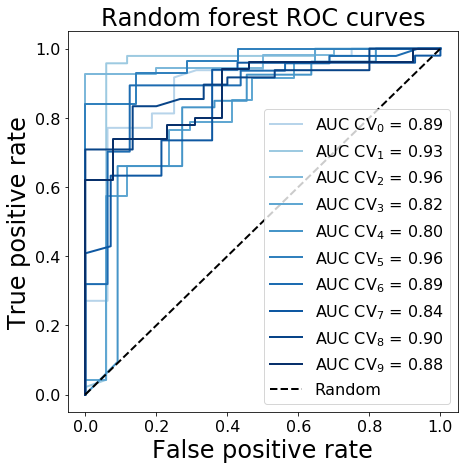

Mean AUC: 0.8864911156038735
Sensitivity: 0.8519685039370078
Accuracy: 0.9378757515030061
Specificity: 0.5367647058823529





In [32]:
# Plot the AUC results
# r contains acc, sens, spec, and results
print_results(r[0], r[1], r[2], r[3], 'Random forest ROC curves', 'rf_roc.png', 3)

In [33]:
# Specify model
modelSvm = svm.SVC(kernel='rbf', C=1, gamma=0.1, probability=True)

# Do cross-validation procedure with 10 folds
r = crossvalidation(modelSvm, df_new, 10)

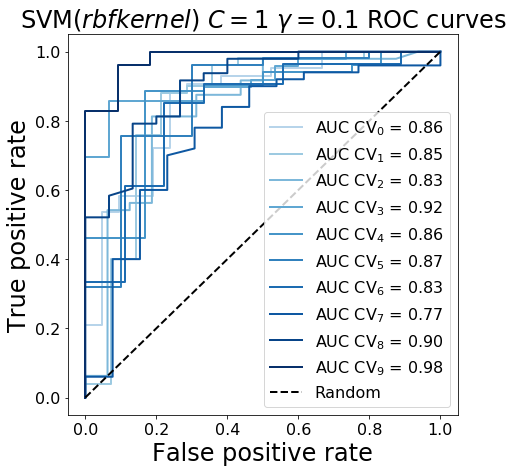

Mean AUC: 0.8660342018629423
Sensitivity: 0.8535433070866142
Accuracy: 0.9579158316633266
Specificity: 0.47058823529411764





In [34]:
# Plot results
print_results(r[0], r[1], r[2], r[3],
              'SVM$(rbf kernel)$ $C=1$ $\gamma=0.1$ ROC curves', 'svm_roc.png', 3)

In [35]:
# Specify model, default activation: relu
modelClf = MLPClassifier(solver='adam', 
                         alpha=1e-5, 
                         hidden_layer_sizes=(5, 3), 
                         random_state=1, early_stopping=False)

# Do cross-validation procedure with 10 folds
r = crossvalidation(modelClf, df_new, 10)

/home/chem/msurhn/.conda/envs/luke/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/chem/msurhn/.conda/envs/luke/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/chem/msurhn/.conda/envs/luke/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/chem/msurhn/.conda/envs/luke/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations 